# Task 2: Text Analysis of Reviews
Perform a detailed analysis of the text data to extract meaningful information and patterns.


# Text Data Overview

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import STOPWORDS
from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

In [ ]:
col_names = ['class', 'review_title', 'review_text']
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prembly/Datasets/train.csv', names=col_names)
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prembly/Datasets/test.csv', names=col_names)

train_1 = train.iloc[:10000]
test_1 = test.iloc[:10000]

In [ ]:
train_1['full_review'] = train_1['review_title'] +  ' ' + train_1['review_text']
test_1['full_review'] = test_1['review_title'] +  ' ' + test_1['review_text']

train_1['class'] = train_1['class'].map({2: 1, 1: 0})
test_1['class'] = test_1['class'].map({2: 1, 1: 0})

train_1 = train_1.drop(['review_title', 'review_text'], axis=1)
test_1 = test_1.drop(['review_title', 'review_text'], axis=1)

# Text Preprocessing

In [ ]:
train_1['full_review'] = train_1['full_review'].astype(str)

more_stopwords = {'***', '...', '&', '-'}
STOPWORDS = STOPWORDS.union(more_stopwords)

In [ ]:
train_1['full_review'].iloc[0]

'Stuning even for the non-gamer This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [ ]:
def generate_ngrams(text, n_gram=1):
    '''
    This function performs the following:
    * Lower text
    * Tokenization
    * Remove stopwords
    * Returns n-grams

    Parameters:
    - text (str): The input text.
    - n_gram (int): The size of n-grams to generate (default is 1).

    Returns:
    - list: A list of n-grams.
    '''

    text_lower = text.lower()
    tokens = [token for token in text_lower.split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    result_ngrams = [' '.join(ngram) for ngram in ngrams]
    return result_ngrams


N = 100
POSITIVE_REVIEWS =  train_1['class'] == 1


# Unigram
positive_unigrams = defaultdict(int)
nonpositive_unigrams = defaultdict(int)

for review in train_1[POSITIVE_REVIEWS]['full_review']:
    for word in generate_ngrams(review, n_gram=1):
        positive_unigrams[word] += 1

for review in train_1[~POSITIVE_REVIEWS]['full_review']:
    for word in generate_ngrams(review, n_gram=1):
        nonpositive_unigrams[word] += 1

df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_nonpositive_unigrams = pd.DataFrame(sorted(nonpositive_unigrams.items(), key=lambda x: x[1])[::-1])



# Bigrams
positive_bigrams = defaultdict(int)
nonpositive_bigrams = defaultdict(int)

for review in train_1[POSITIVE_REVIEWS]['full_review']:
    for word in generate_ngrams(review, n_gram=2):
        positive_bigrams[word] += 1

for review in train_1[~POSITIVE_REVIEWS]['full_review']:
    for word in generate_ngrams(review, n_gram=2):
        nonpositive_bigrams[word] += 1

df_positive_bigrams = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_nonpositive_bigrams = pd.DataFrame(sorted(nonpositive_bigrams.items(), key=lambda x: x[1])[::-1])



# Trigrams
positive_trigrams = defaultdict(int)
nonpositive_trigrams = defaultdict(int)

for review in train_1[POSITIVE_REVIEWS]['full_review']:
    for word in generate_ngrams(review, n_gram=3):
        positive_trigrams[word] += 1

for review in train_1[~POSITIVE_REVIEWS]['full_review']:
    for word in generate_ngrams(review, n_gram=3):
        nonpositive_trigrams[word] += 1

df_positive_trigrams = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_negative_trigrams = pd.DataFrame(sorted(nonpositive_trigrams.items(), key=lambda x: x[1])[::-1])

# Unigram

They both contain alot of similar words, special characters also make it way into the unigram.

Because they are unigrams they really do not make alot of sense right now.



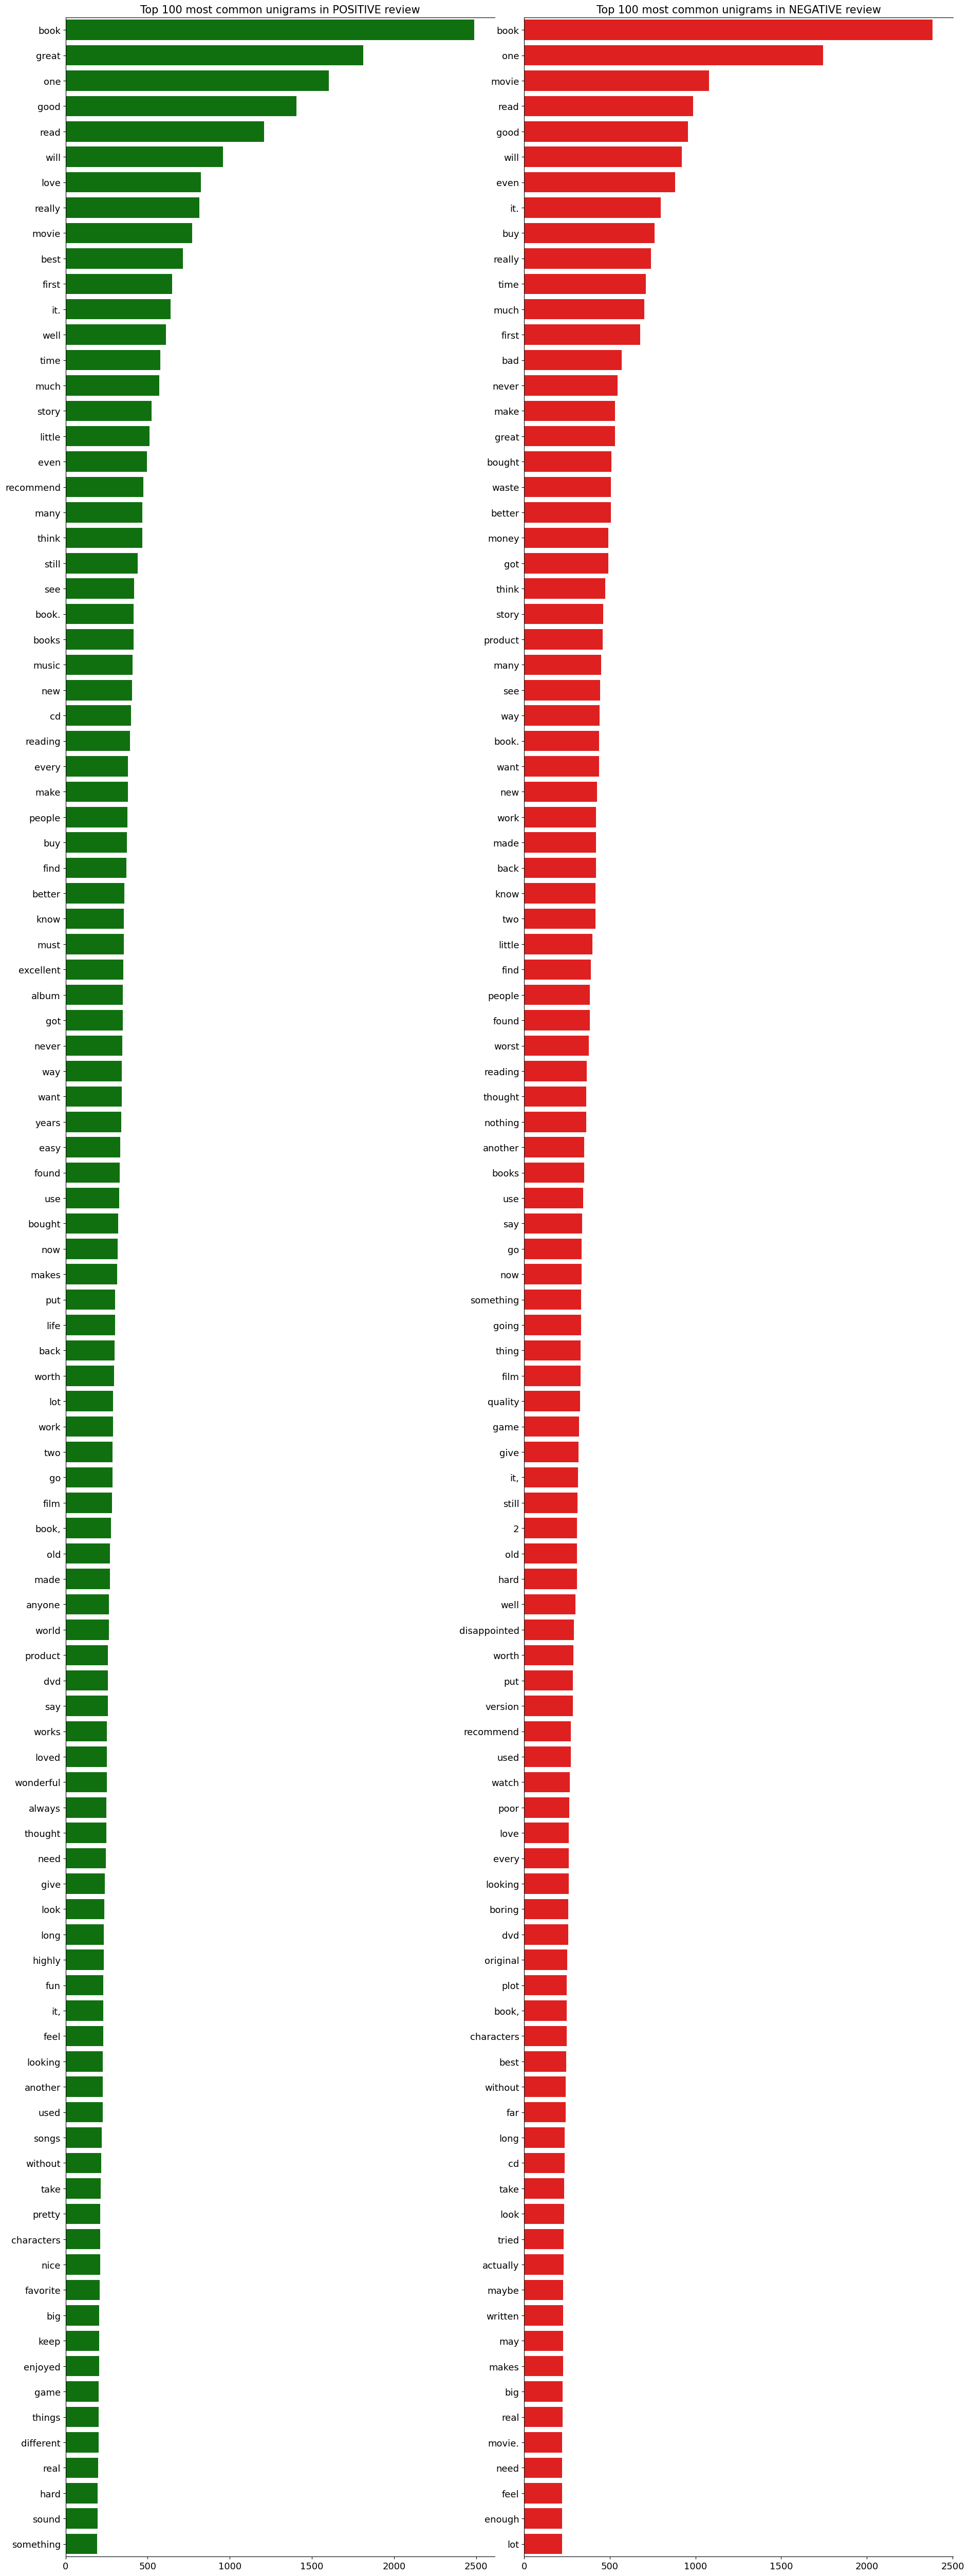

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_unigrams[0].values[:N], x=df_positive_unigrams[1].values[:N], ax=axes[0], color='green')
sns.barplot(y=df_nonpositive_unigrams[0].values[:N], x=df_nonpositive_unigrams[1].values[:N], ax=axes[1], color='red')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in POSITIVE review', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in NEGATIVE review', fontsize=15)

plt.show()

Majority of these words still dont make any sense,

# Bigram

Bigram contains two words, thus they are more clearer than unigram.

Positive reviews contains noticeable positive words, same with Negative reviews.

They still contains similiar words, but far less than unigram.

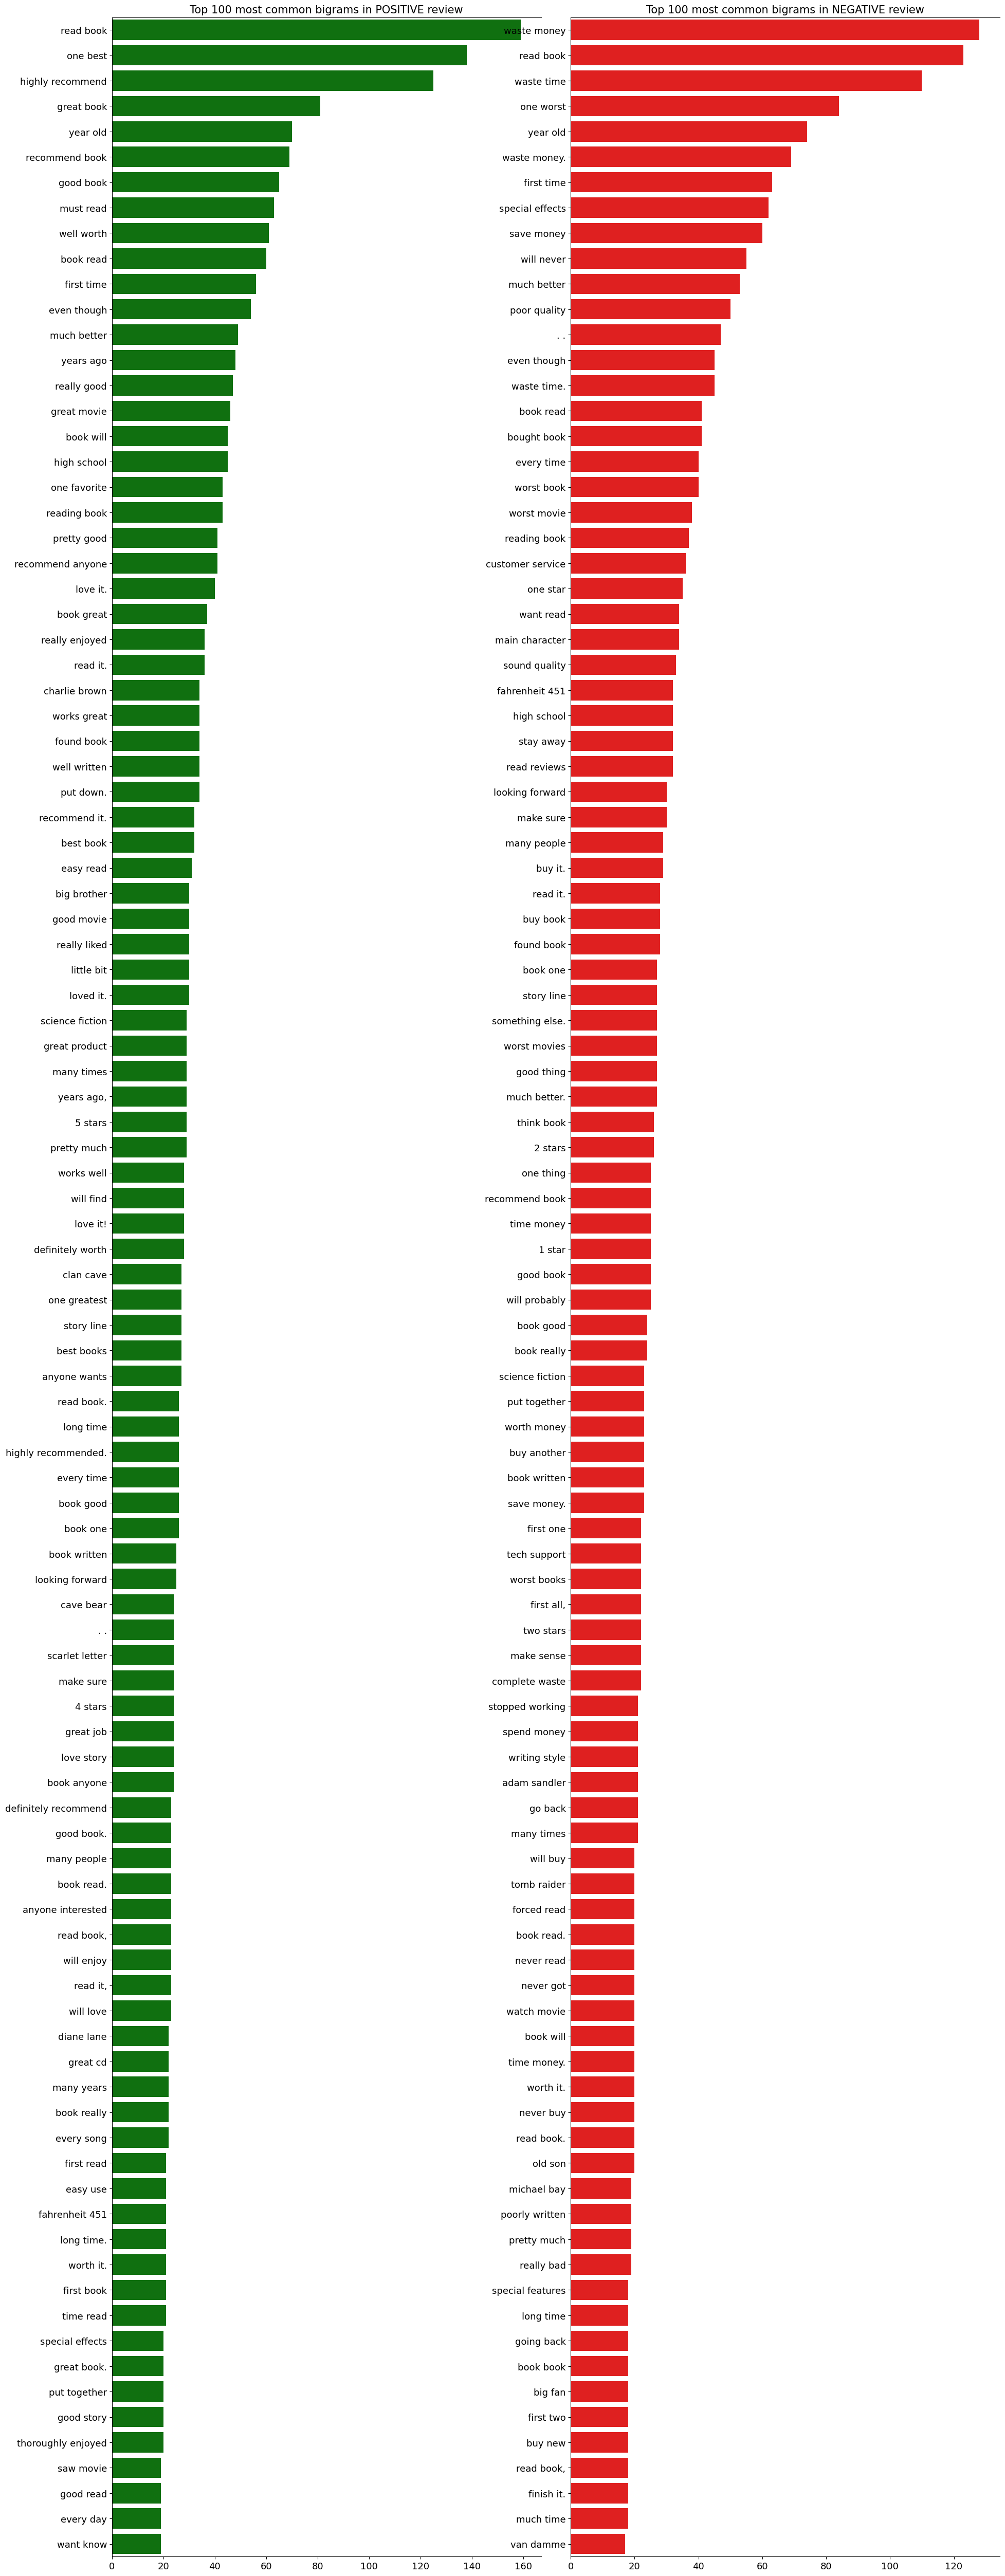

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_bigrams[0].values[:N], x=df_positive_bigrams[1].values[:N], ax=axes[0], color='green')
sns.barplot(y=df_nonpositive_bigrams[0].values[:N], x=df_nonpositive_bigrams[1].values[:N], ax=axes[1], color='red')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in POSITIVE review', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in NEGATIVE review', fontsize=15)

plt.show()

# Trigram

Except reviews that contains 'years old' the context are more clearer.

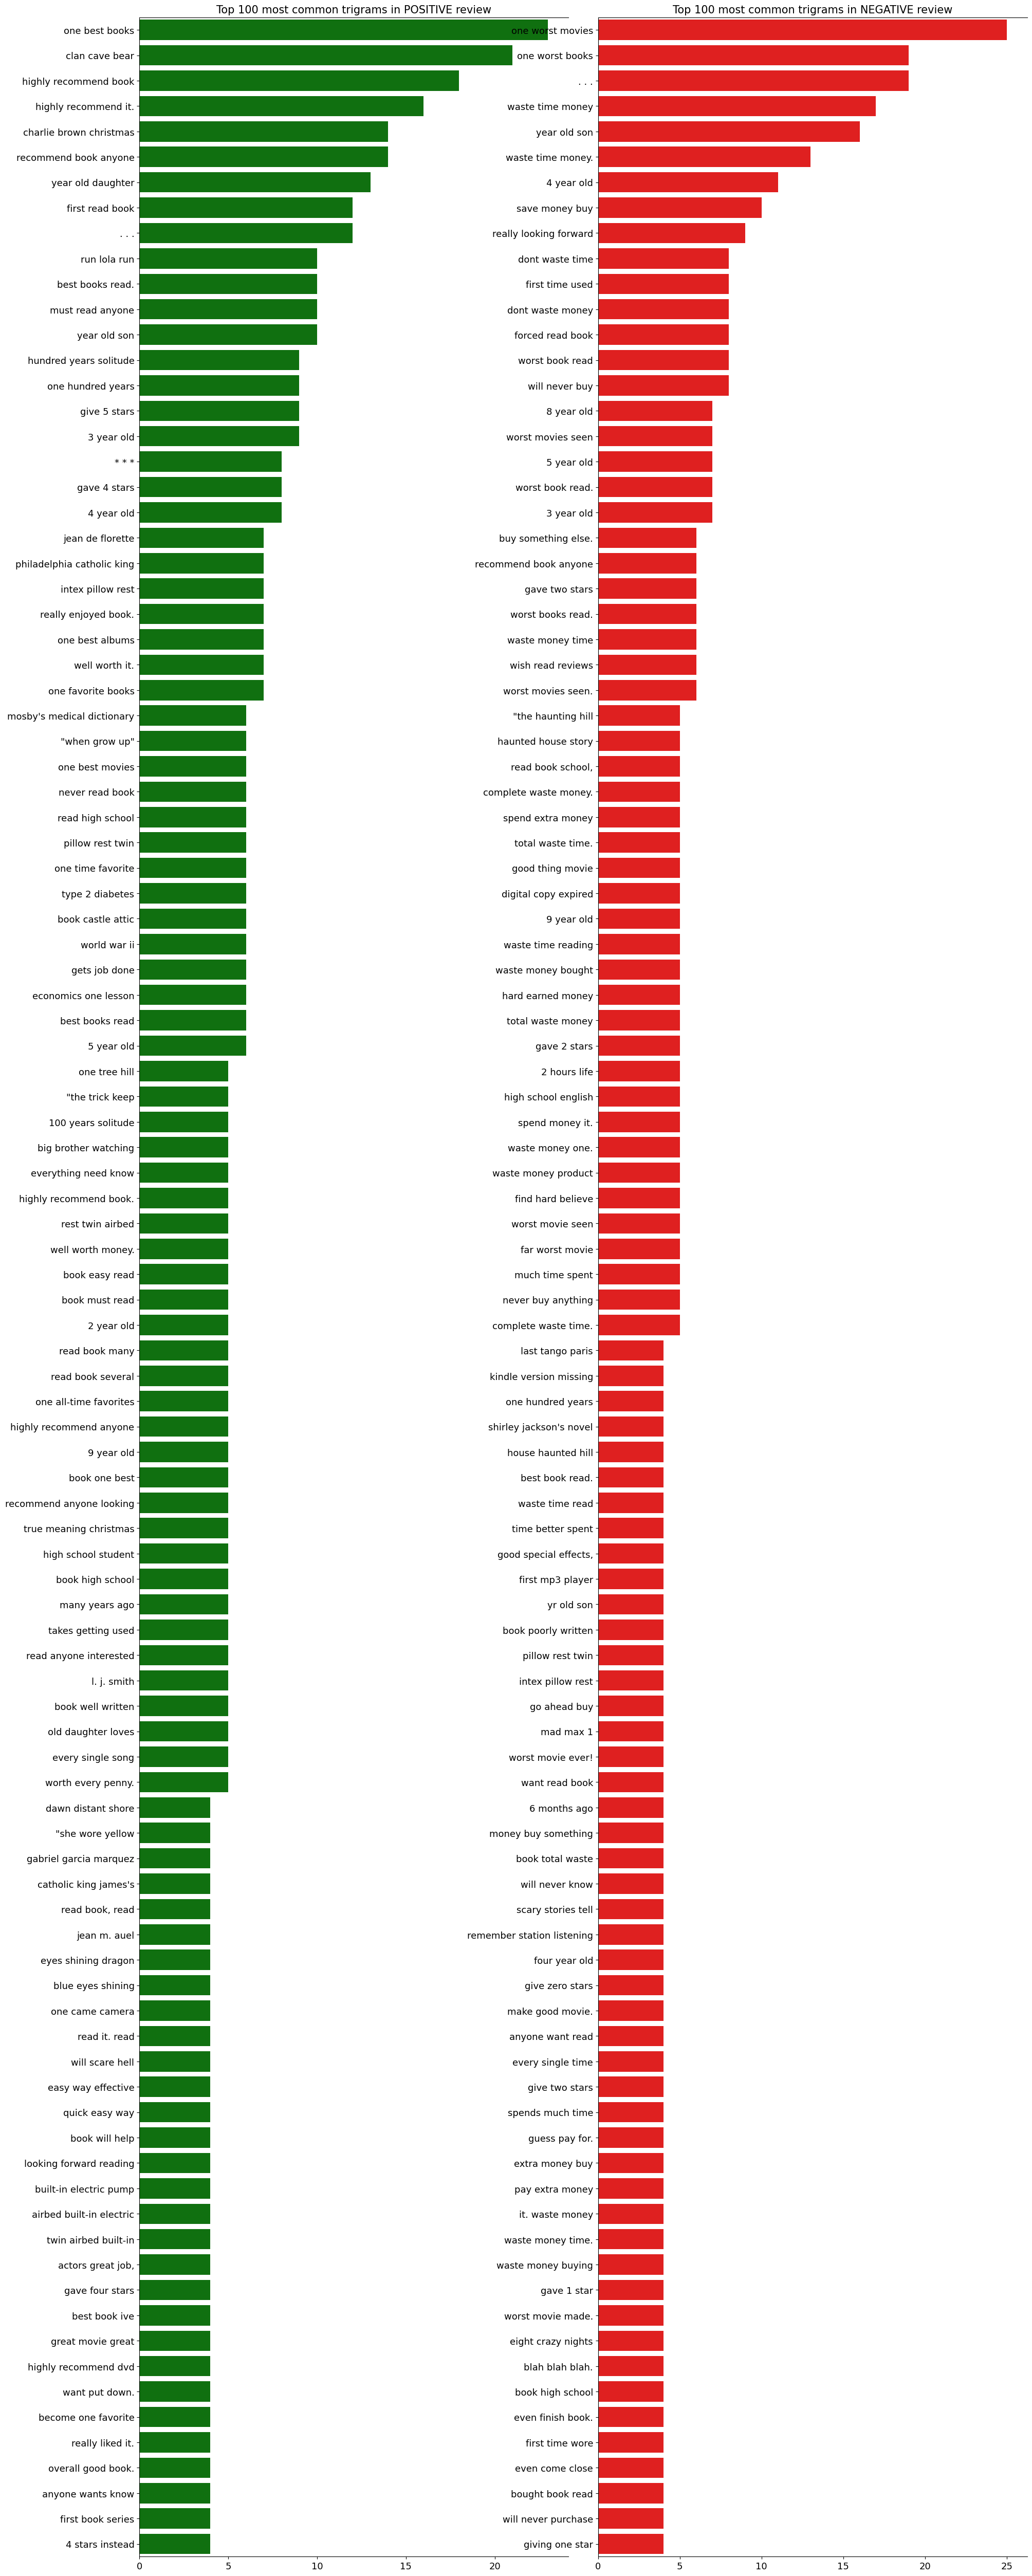

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_trigrams[0].values[:N], x=df_positive_trigrams[1].values[:N], ax=axes[0], color='green')
sns.barplot(y=df_negative_trigrams[0].values[:N], x=df_negative_trigrams[1].values[:N], ax=axes[1], color='red')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common trigrams in POSITIVE review', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in NEGATIVE review', fontsize=15)

plt.show()

In [ ]:
new = train_1[train_1['class'] == 1]
new['full_review'].apply(len)

0       425
1       508
2       759
3       742
4       480
       ... 
9990    194
9991    180
9995    866
9996    860
9999    535
Name: full_review, Length: 4903, dtype: int64

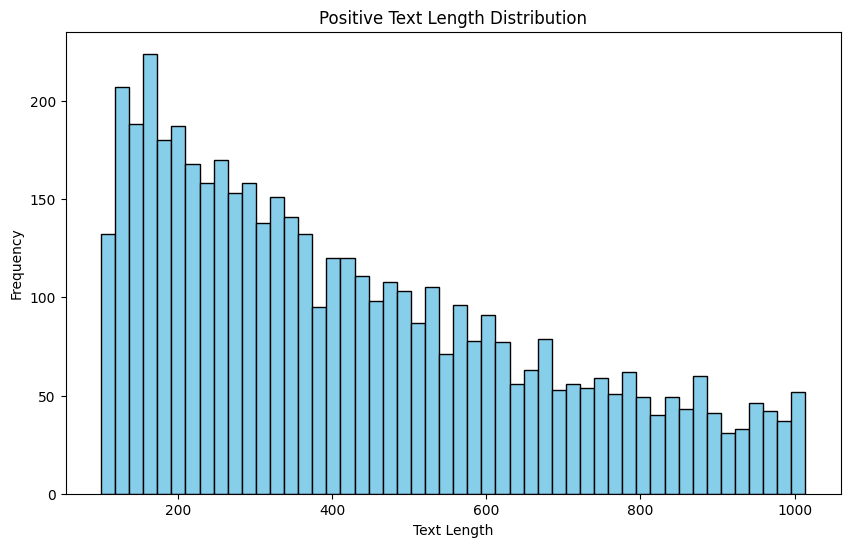

In [ ]:
# Calculate the length of each text in the DataFrame
postive = train_1[train_1['class'] == 1]
text_lengths = postive['full_review'].apply(len)
# text_lengths = train_1[train_1['class'] == 1][['full_review']].apply(len)

# Plotting the distribution of text lengths
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Positive Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

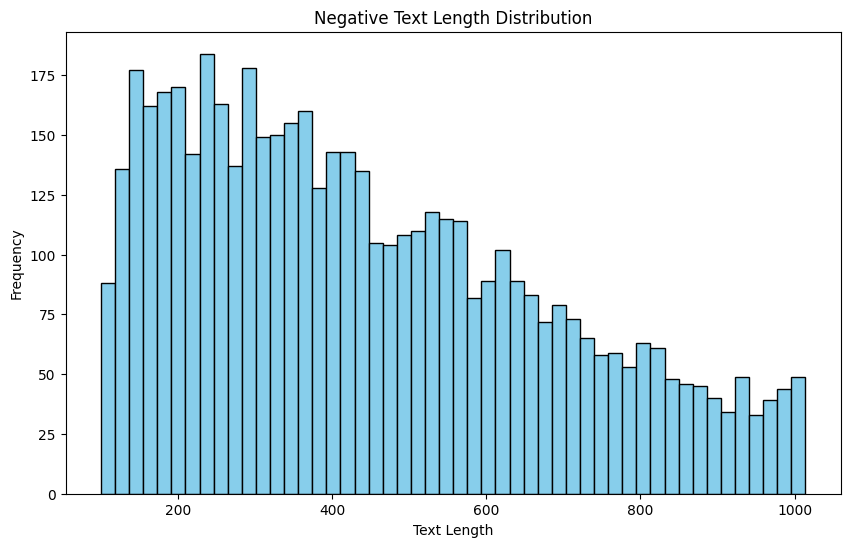

In [ ]:
# Calculate the length of each text in the DataFrame
negative = train_1[train_1['class'] == 0]
text_lengths_negative = negative['full_review'].apply(len)
# text_lengths = train_1[train_1['class'] == 1][['full_review']].apply(len)

# Plotting the distribution of text lengths
plt.figure(figsize=(10, 6))
plt.hist(text_lengths_negative, bins=50, color='skyblue', edgecolor='black')
plt.title('Negative Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Negative reviews have more word per observation that positive reviews

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


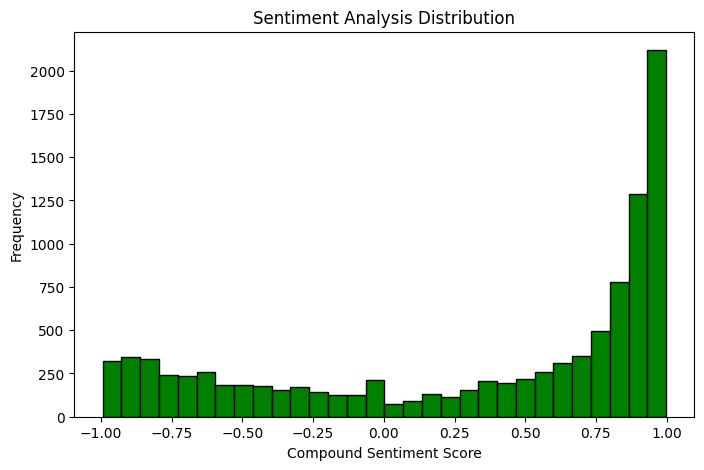

In [ ]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer


text_data = train_1['full_review']
sentiments = train_1['class']

sia = SentimentIntensityAnalyzer()
train_1['compound_score'] = text_data.apply(lambda x: sia.polarity_scores(x)['compound'])

plt.figure(figsize=(8, 5))
plt.hist(train_1['compound_score'], bins=30, color='green', edgecolor='black')
plt.title('Sentiment Analysis Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

The output shows a high portion of the review having positive words.

# Reference:
nlp-with-disaster-tweets-eda-cleaning-and-bert/notebook [link](https://www.kaggle.com/code/gunesevitan/
)